# DATA EXPLORATION

In [91]:
import opendatasets as od
import pandas as pd
import matplotlib
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
#matplotlib.rcParams['figure.facecolor'] = '#00000000'
%matplotlib inline

In [2]:
# Download data from kaggle, Load data into pandas data frame & Save raw data
#dataset_url = 'https://www.kaggle.com/datasets/blastchar/telco-customer-churn'
#od.download(dataset_url)
#churn_data = pd.read_csv('./telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
#churn_data.to_csv('../data/churn_data_raw.csv', index=False)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


100%|██████████| 172k/172k [00:01<00:00, 155kB/s]

In [3]:
# Read data
df = pd.read_csv('../data/churn_data_raw.csv')

## Data Description

- **customerID:** A unique ID that identifies each customer

- **gender:** Whether the customer is a male or a female

- **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)

- **Partner:** Whether the customer has a partner or not (Yes, No)

- **Dependents:** Whether the customer has dependents or not (Yes, No)

- **tenure:** Number of months the customer has stayed with the company

- **PhoneService:** Whether the customer has a phone service or not (Yes, No)

- **MultipleLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)

- **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)

- **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)

- **OnlineBackup:** Whether the customer has online backup or not (Yes, No, No internet service)

- **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)

- **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)

- **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)

- **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)

- **Contract** The contract term of the customer (Month-to-month, One year, Two year)

- **PaperlessBilling:** Whether the customer has paperless billing or not (Yes, No)

- **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card)

- **MonthlyCharges:** The amount charged to the customer monthly

- **TotalCharges:** The total amount charged to the customer

- **Churn:** Whether the customer churned or not (Yes or No)

In [9]:
# View random rows of the dataset
df.sample(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
751,9477-LGWQI,Male,0,Yes,Yes,70,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),80.15,5600.15,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
2399,7176-WIONM,Female,0,Yes,No,12,No,No phone service,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),49.85,617.15,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
5841,7136-RVDTZ,Male,1,No,No,70,No,No phone service,DSL,No,No,No,No,Yes,Yes,One year,Yes,Electronic check,45.25,3264.45,Yes
5877,6777-TGHTM,Female,0,No,No,53,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),106.95,5785.5,Yes
1595,2761-OCIAX,Male,1,No,No,2,Yes,No,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,74.70,165.4,Yes


In [7]:
# Display a basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [79]:
# Show summary statistics for the numeric columns
df.drop(columns='SeniorCitizen').describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.763666
std,24.559481,30.090047,2266.765057
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [14]:
# Check for missing values
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# EDA

### Distribution of `Churn`

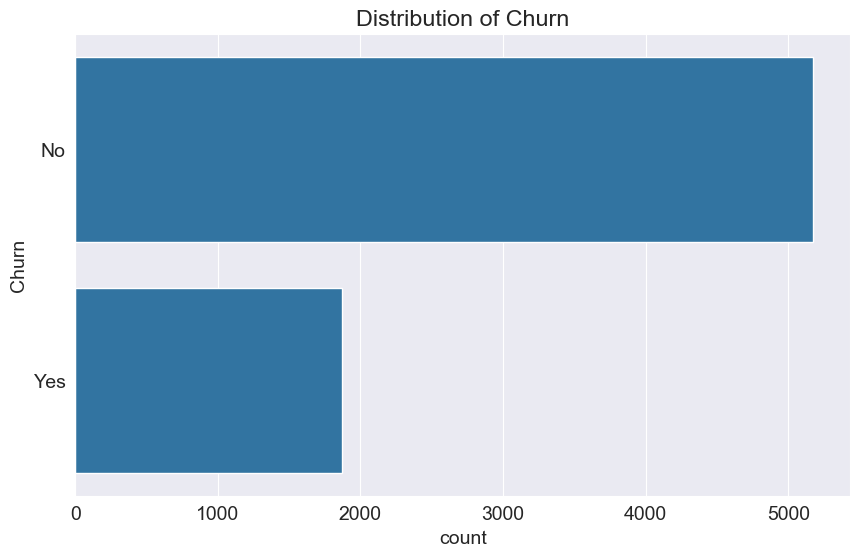

In [92]:
# Visualize the distribution of churned vs non-churned customers
sns.countplot(df['Churn'])
plt.title('Distribution of Churn')
plt.savefig('../plots/churn_distribution.png')
plt.show()

**Based on the countplot for customer churn**
- The plot shows two category: 'No' and 'Yes' for customer churn status.
- The bar for 'No' is significantly taller that the bar for 'yes'.
- This indicates that a much larger proportion of customers did not churn compared to those who did.
- The visualization highlights a clear disparity, with non-churning customers comprising the majority of the dataset.

### Distribution of `tenure`

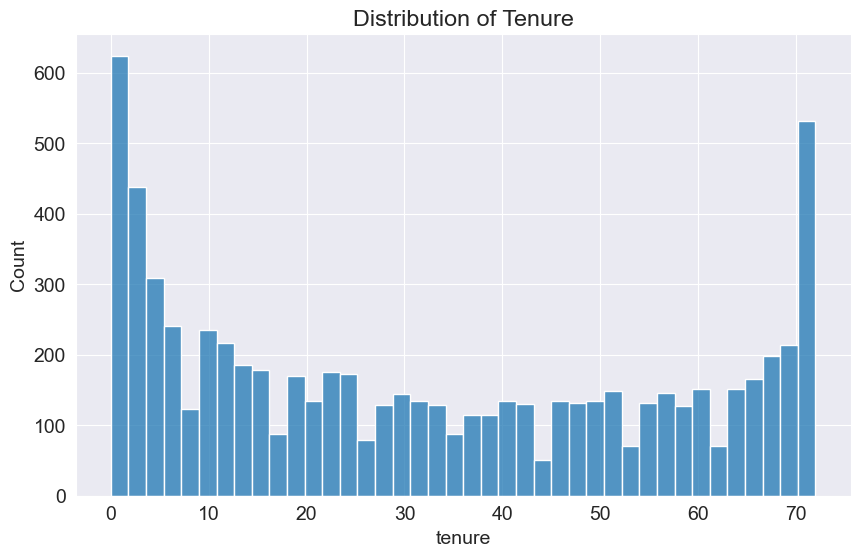

In [93]:
# Calculate histogram
counts_tenure, bin_edges_tenure = np.histogram(df['tenure'], bins=40)

# Visualize the distribution of tenure
sns.histplot(df['tenure'], bins=40)
plt.title('Distribution of Tenure')
plt.savefig('../plots/tenure_distribution.png')
plt.show()

In [48]:
# Print bin values
for i in range(len(bin_edges_charges)-1):
    print(f"Bin {i+1}: {bin_edges_tenure[i]} to {bin_edges_tenure[i+1]}, Count: {counts_tenure[i]}")

Bin 1: 0.0 to 1.8, Count: 624
Bin 2: 1.8 to 3.6, Count: 438
Bin 3: 3.6 to 5.4, Count: 309
Bin 4: 5.4 to 7.2, Count: 241
Bin 5: 7.2 to 9.0, Count: 123
Bin 6: 9.0 to 10.8, Count: 235
Bin 7: 10.8 to 12.6, Count: 216
Bin 8: 12.6 to 14.4, Count: 185
Bin 9: 14.4 to 16.2, Count: 179
Bin 10: 16.2 to 18.0, Count: 87
Bin 11: 18.0 to 19.8, Count: 170
Bin 12: 19.8 to 21.6, Count: 134
Bin 13: 21.6 to 23.400000000000002, Count: 175
Bin 14: 23.400000000000002 to 25.2, Count: 173
Bin 15: 25.2 to 27.0, Count: 79
Bin 16: 27.0 to 28.8, Count: 129
Bin 17: 28.8 to 30.6, Count: 144
Bin 18: 30.6 to 32.4, Count: 134
Bin 19: 32.4 to 34.2, Count: 129
Bin 20: 34.2 to 36.0, Count: 88
Bin 21: 36.0 to 37.800000000000004, Count: 115
Bin 22: 37.800000000000004 to 39.6, Count: 115
Bin 23: 39.6 to 41.4, Count: 134
Bin 24: 41.4 to 43.2, Count: 130
Bin 25: 43.2 to 45.0, Count: 51
Bin 26: 45.0 to 46.800000000000004, Count: 135
Bin 27: 46.800000000000004 to 48.6, Count: 132
Bin 28: 48.6 to 50.4, Count: 134
Bin 29: 50.4 to 

**Interpretation of the Histogram for Tenure**

The histogram represents the distribution of the number of months customers have stayed with the company. Here's a detailed interpretation:

1. Initial Tenure (0-9 months):

    - The first few bins (0.0 to 9.0 months) show high counts, indicating a significant number of customers have a short tenure with the company.
    - Specifically, the first bin (0.0 to 1.8 months) has the highest count of 624, suggesting many customers leave shortly after joining.

2. Middle Tenure (9-36 months):

    - The counts generally decrease as the tenure increases from 9 months to about 36 months.
    - There are some fluctuations, such as a slight increase around 10.8 to 12.6 months (216) and another rise at 18.0 to 19.8 months (170).

3. Extended Tenure (36-72 months):

    - There are notable spikes at certain points, such as around 45.0 to 46.8 months (135), and consistent counts around 50.4 to 52.2 months (148).
    - The counts gradually increase again as we approach the higher end of tenure, particularly between 66.6 to 72.0 months.

4. Long Tenure (72 months):

    - The last bin (70.2 to 72.0 months) shows a significant increase with 532 customers, indicating a large group of customers who have remained with the company for the longest duration captured in this data.


**Summary**

- **High Early Churn:** A large number of customers churn early, within the first 9 months.
- **Fluctuating Mid-Tenure:** The middle tenure shows fluctuating counts but generally lower than the initial tenure.
- **Stable Long Tenure:** Customers who stay longer than 36 months show a tendency to remain, with significant numbers staying up to 72 months.
- **Retention Peaks:** Certain tenure periods (e.g., 45-47 months, 66-72 months) have higher retention, indicating potential milestones or benefits encouraging customers to stay longer.

### Distribution of `MonthlyCharges`

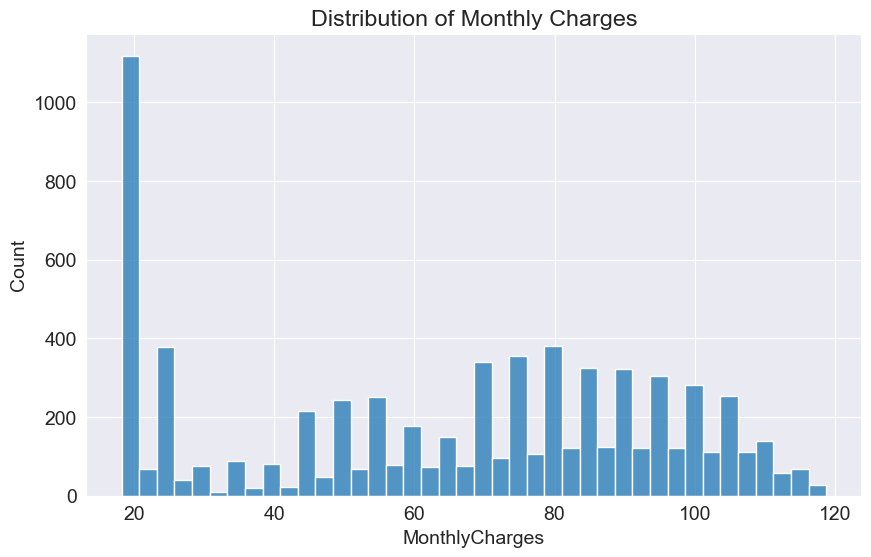

In [94]:
# Calculate histogram
counts_charges, bin_edges_charges = np.histogram(df['MonthlyCharges'], bins=40)

# Visualize Monthly charges distribution
sns.histplot(df['MonthlyCharges'], bins=40)
plt.title('Distribution of Monthly Charges')
plt.savefig('../plots/monthly_charges_distribution.png')
plt.show()

In [51]:
# Print bin values
for i in range(len(bin_edges_charges)-1):
    print(f"Bin {i+1}: {bin_edges_charges[i]} to {bin_edges_charges[i+1]}, Count: {counts_charges[i]}")

Bin 1: 18.25 to 20.7625, Count: 1118
Bin 2: 20.7625 to 23.275, Count: 69
Bin 3: 23.275 to 25.7875, Count: 379
Bin 4: 25.7875 to 28.3, Count: 40
Bin 5: 28.3 to 30.8125, Count: 75
Bin 6: 30.8125 to 33.325, Count: 10
Bin 7: 33.325 to 35.837500000000006, Count: 87
Bin 8: 35.837500000000006 to 38.35, Count: 19
Bin 9: 38.35 to 40.8625, Count: 80
Bin 10: 40.8625 to 43.375, Count: 22
Bin 11: 43.375 to 45.8875, Count: 216
Bin 12: 45.8875 to 48.400000000000006, Count: 47
Bin 13: 48.400000000000006 to 50.9125, Count: 242
Bin 14: 50.9125 to 53.425000000000004, Count: 67
Bin 15: 53.425000000000004 to 55.9375, Count: 252
Bin 16: 55.9375 to 58.45, Count: 78
Bin 17: 58.45 to 60.962500000000006, Count: 177
Bin 18: 60.962500000000006 to 63.475, Count: 72
Bin 19: 63.475 to 65.98750000000001, Count: 149
Bin 20: 65.98750000000001 to 68.5, Count: 75
Bin 21: 68.5 to 71.0125, Count: 339
Bin 22: 71.0125 to 73.525, Count: 96
Bin 23: 73.525 to 76.0375, Count: 354
Bin 24: 76.0375 to 78.55000000000001, Count: 106


**Interpretation of the Histogram for Monthly Charges**

1. Low Monthly Charges (18.25 - 30.8125):

    - The first few bins show varying counts, with a significant peak at the lowest bin (18.25 to 20.7625) having the highest count of 1118.
    - This suggests a large number of customers are charged relatively low amounts monthly.

2. Mid-Range Monthly Charges (30.8125 - 63.475):

    - There are fluctuations in counts, with some bins showing low counts (e.g., 30.8125 to 33.325 with 10 counts) and others showing higher counts (e.g., 43.375 to 45.8875 with 216 counts).
    - This range indicates moderate variation in the number of customers being charged different mid-range amounts.

3. High Monthly Charges (63.475 - 96.1375):

    - Several peaks are present in this range, particularly at 65.9875 to 68.5 (75 counts), 68.5 to 71.0125 (339 counts), 73.525 to 76.0375 (354 counts), and 78.55 to 81.0625 (381 counts).
    - These peaks suggest that a considerable number of customers are charged higher monthly amounts in these specific ranges.

4. Very High Monthly Charges (96.1375 - 118.75):

- The counts are more evenly spread in this range, with notable peaks at certain points, such as 98.65 to 101.1625 (281 counts) and 103.675 to 106.1875 (254 counts).
- There are fewer customers in the highest charge range (116.2375 to 118.75) with only 27 counts, indicating very high monthly charges are less common.


**Summary**

- **Large Group with Low Charges:** A significant number of customers are charged low amounts monthly, with the highest count in the lowest bin (18.25 to 20.7625).
- **Mid-Range Variation:** The mid-range charges show variability, with some bins having low counts and others higher, indicating a diverse charging structure for moderate amounts.
- **Multiple Peaks in Higher Charges:** There are several peaks in the higher charge range (63.475 to 96.1375), showing many customers fall into these specific charge categories.
- **Fewer Very High Charges:** The counts decrease as we move towards very high monthly charges, with the highest bins having fewer customers.

In [68]:
# Check missing values of the 'TotalCharges' column
print(' ' in df['TotalCharges'].tolist())
df[df['TotalCharges'] == ' ']

True


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [72]:
# Handle missing values in the 'TotalCharges' columns
df['TotalCharges'] = df['TotalCharges'].replace(' ', '0')

df['TotalCharges'] = df['TotalCharges'].astype('float')

min_charges = df['TotalCharges'].min()

df['TotalCharges'] = df['TotalCharges'].replace(0.0, np.nan)

df['TotalCharges'] = df['TotalCharges'].fillna(min_charges)

df[df['customerID'] == '4472-LVYGI']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,18.8,No


In [76]:
# Extract numeric summaries
stats = df.drop(columns=['SeniorCitizen']).groupby('Churn').describe()

In [77]:
stats

tenure                                                     \
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0   
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      MonthlyCharges                                                    \
               count       mean        std    min    25%     50%   75%   
Churn                                                                    
No            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4   
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2   

              TotalCharges                                                    \
          max        count         mean          std    min    25%       50%   
Churn                                                                          
No     118.75       5174.0  2549.951411  2329.910625  18.80  572.9  1679.525   
Yes    118.35       1869.0  1531.796094  1890.822994  18.85  134.5   703.550   

                         
           75%      max  
Churn                    
No     4262.85  8672.45  
Yes    2331.30  8684.80

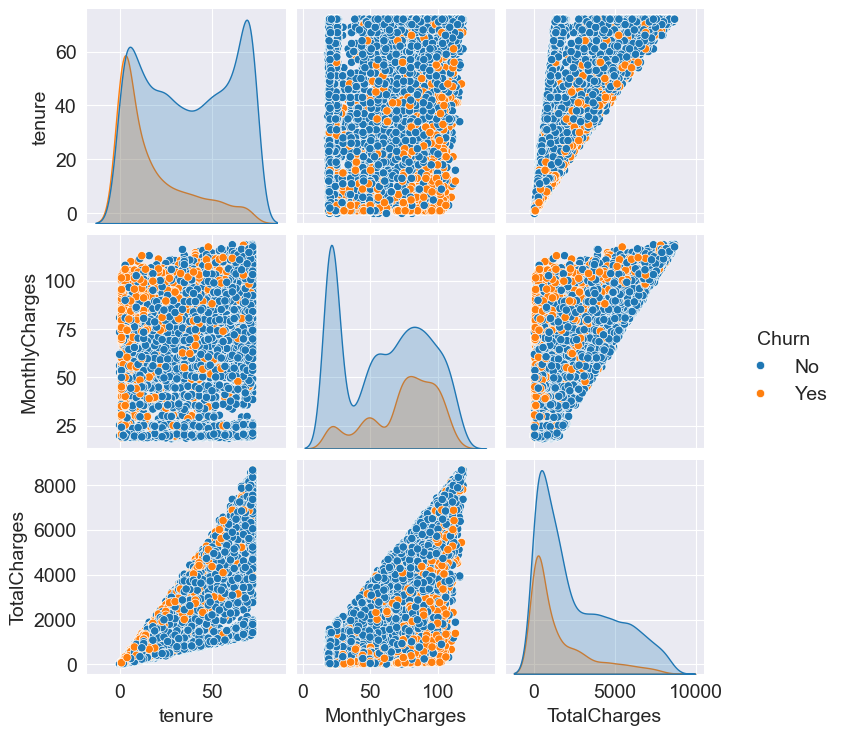

In [95]:
# Visualize relationships
sns.pairplot(df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.savefig('../plots/relationships.png')
plt.show()

**Interpretation of Pairplot with Summary Statistics**

1. `tenure` vs. `MonthlyCharges` vs. `TotalCharges` by `Churn`:

    - `tenure` vs. `MonthlyCharges`:

        - Customers who churn (Churn = Yes) tend to have lower average tenure (mean = 17.98) compared to those who do not churn (Churn = No, mean = 37.57).
        - Monthly charges (MonthlyCharges) for churned customers (Churn = Yes) tend to be higher on average (mean = 74.44) compared to non-churned customers (Churn = No, mean = 61.27).

    - `tenure` vs. `TotalCharges`:

        - Non-churned customers (Churn = No) generally have higher total charges (TotalCharges) (mean = 2549.95) compared to churned customers (Churn = Yes, mean = 1531.80).
        - This suggests that customers who stay longer (tenure) tend to accumulate higher total charges, likely indicating higher customer lifetime value.

    - `MonthlyCharges` vs. `TotalCharges`:

        - There is a positive correlation between MonthlyCharges and TotalCharges, indicating that customers who pay higher monthly charges also tend to have higher total charges over their tenure.

2. Influence of `Churn`:

    - Churned customers (Churn = Yes) typically exhibit shorter tenures, higher monthly charges, and lower total charges compared to non-churned customers (Churn = No).

## Examing the presence of outliers

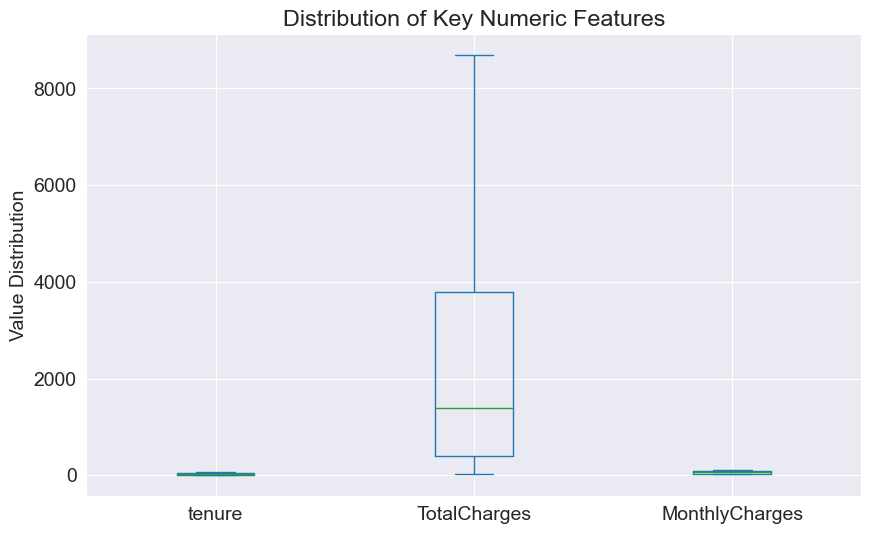

In [96]:
# Examine outliers
df[['tenure', 'TotalCharges', 'MonthlyCharges']].plot(kind='box')
plt.title('Distribution of Key Numeric Features')
plt.ylabel('Value Distribution')
plt.savefig('../plots/box_plots.png')
plt.show()

From the box plots, it is observed that there are no significant outliers in the distributions of `tenure`, `TotalCharges`, and `MonthlyCharges`.

# Conclusion

In the data exploration phase, the customer dataset consisting of 7043 entries with 21 features was analysed. The data includes various attributes of customers such as demographic information, subscription details, service usage, and billing information.

**Key Observations:**

1. **Data Integrity:**
   - All columns have complete data with no missing values, as confirmed by the `df.isna().sum()` summary. However, it was noted that the `TotalCharges` column, although marked as non-null, contained some empty strings, which were converted to the minimum value to maintain numerical integrity.

2. **Customer Demographics:**
   - The dataset includes categorical variables such as `gender`, `SeniorCitizen`, `Partner`, `Dependents`, and others related to service subscriptions and billing preferences.

3. **Tenure:**

   - The tenure of customers ranges from 0 to 72 months, with a mean of approximately 32 months. Non-churned customers generally have longer tenures compared to churned customers.

4. **Monthly Charges:**

   - MonthlyCharges range from $18.25 to $118.75, with an average of about $64.76. Churned customers tend to have higher monthly charges on average compared to non-churned customers, which may indicate pricing sensitivity.

5. **Total Charges:**

   - TotalCharges range from $18.80 to $8684.80, with a mean of $2279.76. Non-churned customers accumulate higher total charges due to longer tenures.

6. **Churn Distribution:**

   - The data shows a higher count of non-churned customers compared to churned ones. This imbalance will be important to consider in subsequent modeling steps.

7. **Services and Contracts:**

   - Customers use various services like phone, internet, and streaming services, with different levels of additional services such as `OnlineSecurity` and `TechSupport`. The contract types (`Month-to-month`, `One year`, `Two year`) and payment methods (`Electronic check`, `Mailed check`, `Bank transfer`, `Credit card`) provide insights into customer preferences and potential factors influencing churn.

**Summary:**

The exploratory data analysis revealed distinct patterns in the dataset that can inform an approach to building a predictive model for customer churn. Longer tenure and lower monthly charges are associated with lower churn rates, while higher monthly charges are linked to higher churn rates. Understanding these relationships and the customer demographics will be crucial in developing effective churn prediction models and strategies for customer retention. The next steps will involve data preprocessing, feature engineering, model selection, and evaluation to predict churn effectively.